In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data

%matplotlib inline #prevents you from putting plot.show() each time.

Use the iris database to answer the following quesitons:

In [2]:
iris = sns.load_dataset('iris')

What does the distribution of petal lengths look like?

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

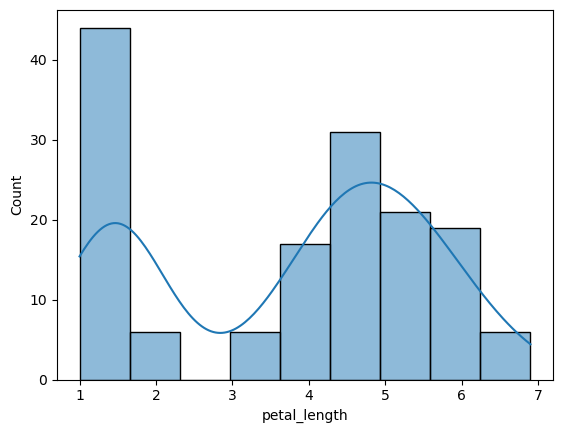

In [29]:
#sns.boxplot(x='petal_length', data=iris)
sns.histplot(data=iris, x='petal_length', kde=True)

Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

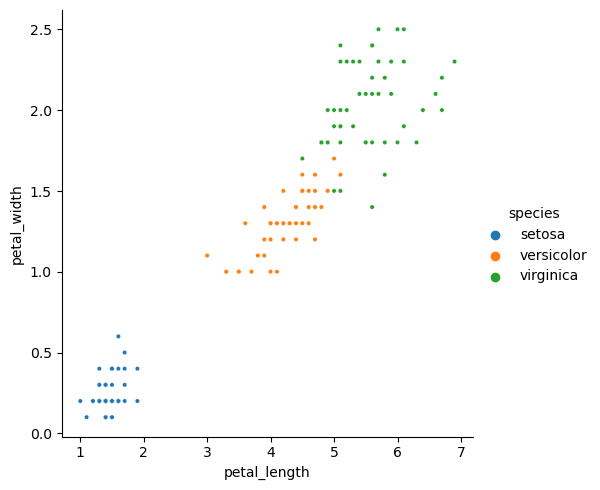

In [30]:
sns.relplot(x='petal_length', y= 'petal_width', data=iris, s=10, color=".2", hue='species')


Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

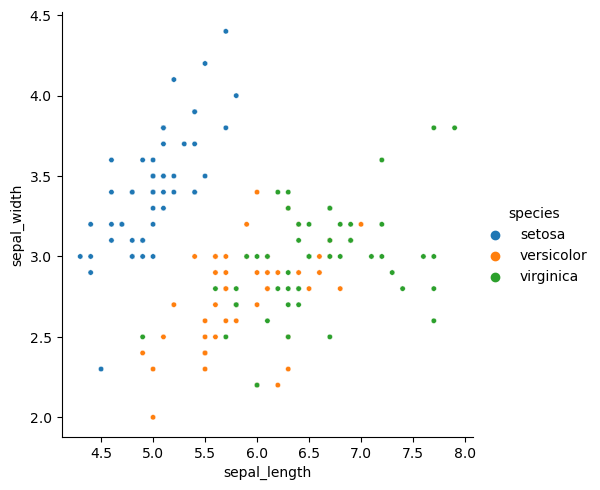

In [5]:
sns.relplot(x='sepal_length', y= 'sepal_width', data=iris, s=15, color=".2", hue='species')


Which features would be best used to predict species?

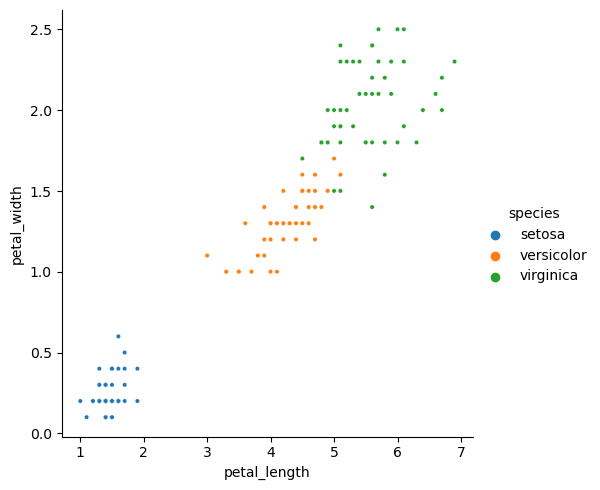

In [6]:
sns.relplot(x='petal_length', y= 'petal_width', data=iris, s=10, color=".2", hue='species')
# Petal size

Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 

What do you notice?

In [7]:
acomb= sns.load_dataset('anscombe')

In [8]:
# This data does not speak to me.

In [9]:
acomb.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


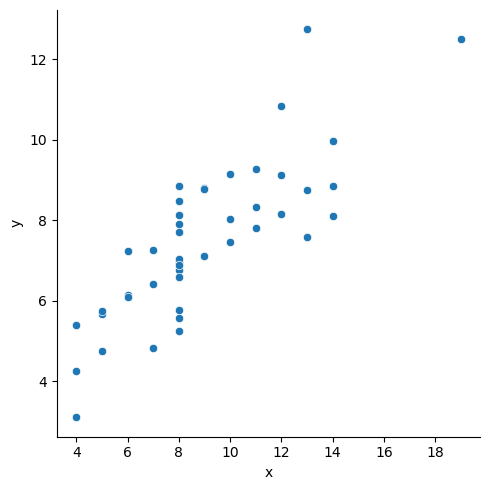

In [10]:
sns.relplot(x='x', y='y', data=acomb)

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

<AxesSubplot:xlabel='x', ylabel='Count'>

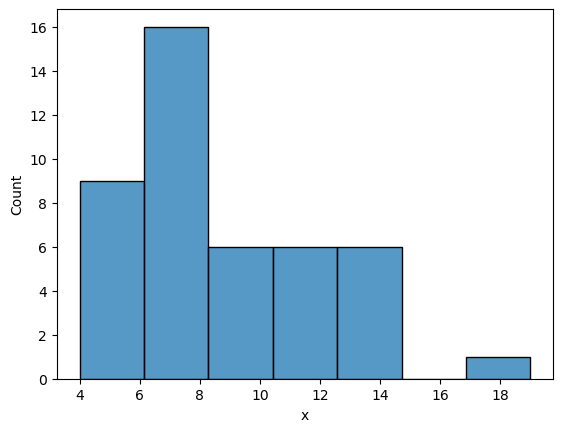

In [11]:
sns.histplot(x='x', data=acomb)

<AxesSubplot:xlabel='y', ylabel='Count'>

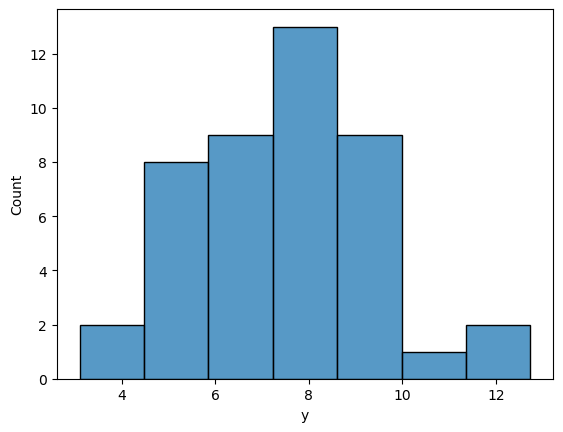

In [12]:
sns.histplot(x='y', data=acomb)

Load the InsectSprays dataset and read it's documentation. 

In [13]:
insect_sprays = data('InsectSprays')

Create a boxplot that shows the effectiveness of the different insect sprays.

<AxesSubplot:>

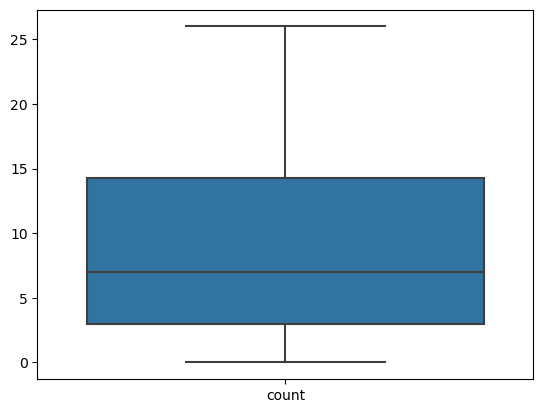

In [14]:
sns.boxplot( data=insect_sprays)

Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [15]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [16]:

def cath_fert_rate(rate):
    swiss['is_catholic'] = swiss['Catholic'] > rate
    return swiss
fert_df = cath_fert_rate(30.0)
fert_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,True
Neuveville,76.9,43.5,17,15,5.16,20.6,False


Does whether or not a province is Catholic influence fertility?

In [17]:
# Yes, it appears being Catholic is a polerizing attribute for all other attributes including fertility.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


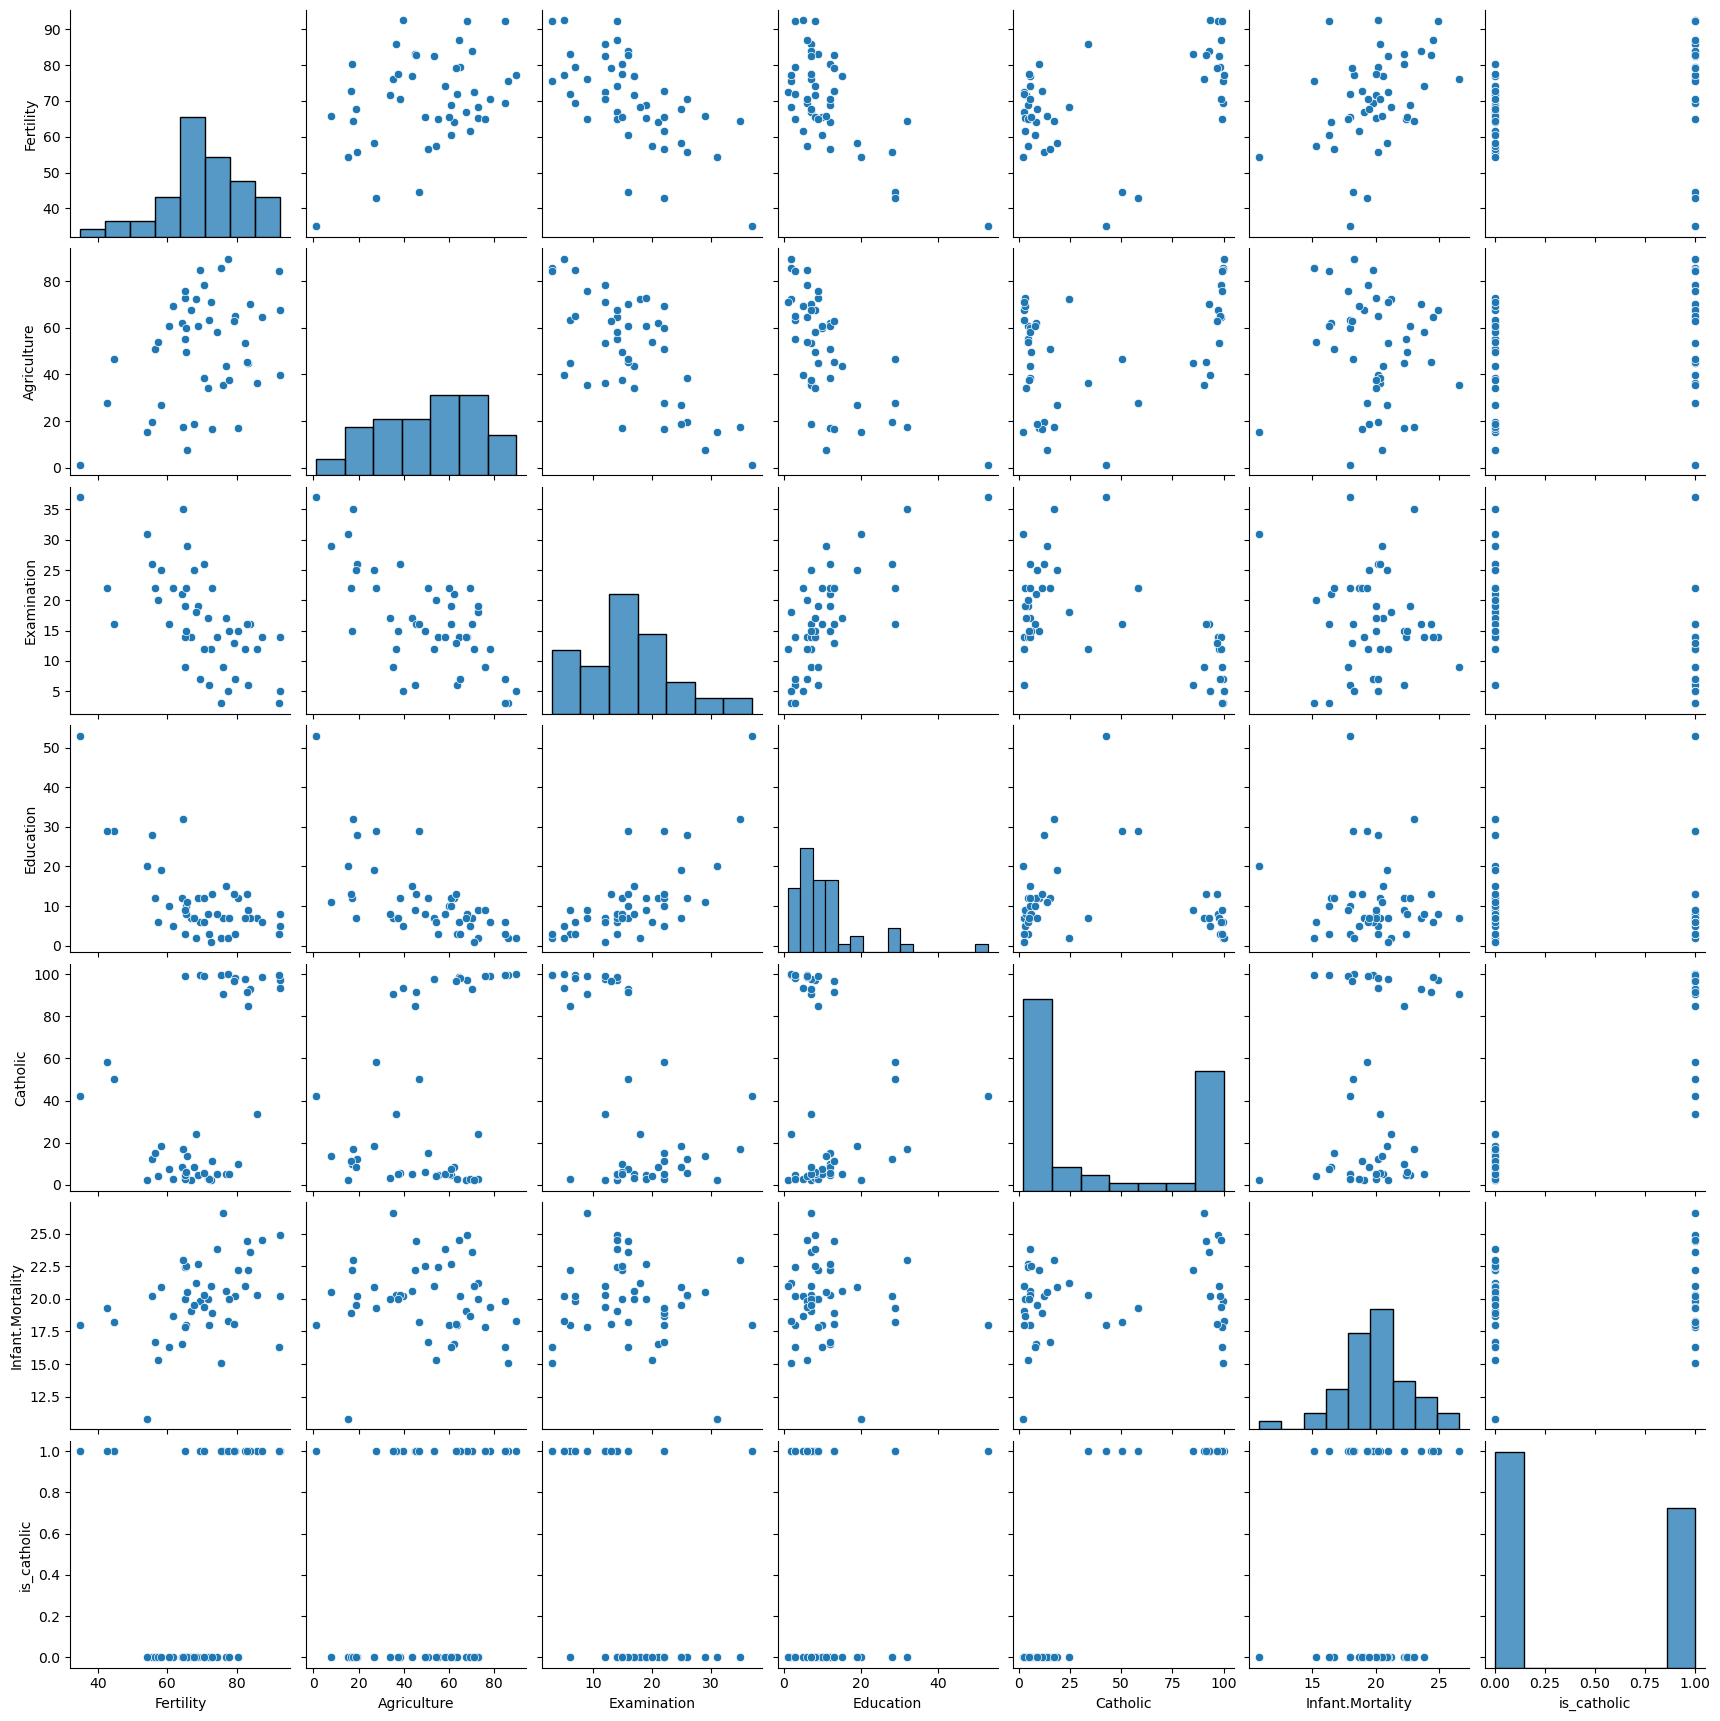

In [18]:
sns.pairplot(data=swiss)
#sns.relplot(x=swiss['Fertility'], y=swiss['Catholic'])

What measure correlates most strongly with fertility?

In [19]:
# Examination seems to negativly correlate with fertility.

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [20]:
from env import host, username, password
def get_db_url(host, username, password, database):
    return f'mysql+pymysql://{username}:{password}@{host}/{database}'
url = get_db_url(host, username, password, 'chipotle')

In [21]:
query_chipotle = "SELECT * FROM orders;"
chipotle_db = pd.read_sql(query_chipotle, url)

In [22]:
chipotle_db['item_price'] = chipotle_db['item_price'].str.replace('$','').astype(float)


/var/folders/sg/9h_lqlfd6bgb63_prv2nr4mm0000gn/T/ipykernel_2670/1686845614.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_db['item_price'] = chipotle_db['item_price'].str.replace('$','').astype(float)


In [23]:
pop_items = chipotle_db.groupby('item_name').agg('sum').sort_values('quantity', ascending=False).head(4)
pop_items

,id,order_id,quantity,item_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43


Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [24]:
sleep_study = data('sleepstudy')
sleep_study.sample(10)

,Reaction,Days,Subject
136,352.8287,5,352
163,277.8989,2,371
109,336.2806,8,349
142,268.4369,1,369
6,414.6901,5,308
128,266.5955,7,351
90,237.2466,9,335
140,388.5417,9,352
81,241.6083,0,335
3,250.8006,2,308


In [25]:
sleep_study.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


<AxesSubplot:xlabel='Reaction', ylabel='Count'>

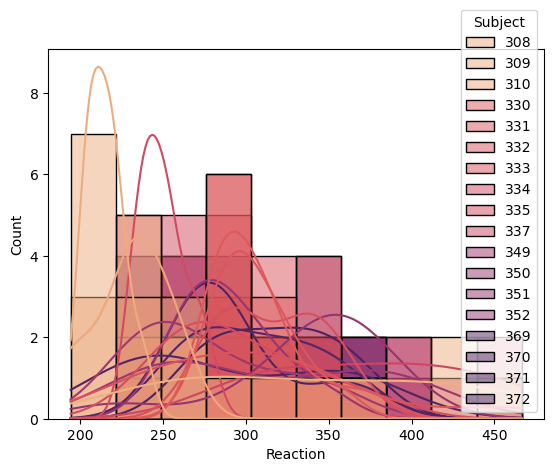

In [26]:
sns.histplot(data=sleep_study, x='Reaction', hue='Subject', palette="flare", kde=True)